# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

## Importing libraries and loading dataset

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

crops = pd.read_csv("soil_measures.csv")

## Inspecting the data

In [2]:
crops.head(10)

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice
5,69,37,42,7.073454,rice
6,69,55,38,5.700806,rice
7,94,53,40,5.718627,rice
8,89,54,38,6.685346,rice
9,68,58,38,6.336254,rice


In [3]:
crops.shape

(2200, 5)

In [4]:
crops['crop'].value_counts()

crop
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [5]:
crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [6]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


## Splitting the data

In [7]:
seed = 42

In [8]:
X = crops.drop('crop', axis=1)
y = crops['crop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## Predicting

In [9]:
features = ['N', 'P', 'K', 'ph']

In [10]:
scores = []

for feature in features:
    model = LogisticRegression(max_iter=2000, multi_class='multinomial')

    X_train_feature = X_train[feature].values.reshape(-1, 1)
    X_test_feature = X_test[feature].values.reshape(-1, 1)

    model.fit(X_train_feature, y_train)

    predictions = model.predict(X_test_feature)
    scores.append(f1_score(predictions, y_test, average='weighted'))

/Users/gabriel/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gabriel/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [11]:
print(scores)

[0.18701041234890123, 0.2465831814118447, 0.30695572108224284, 0.14963200879311425]


## Correlation analysis

In [12]:
X.corr()

,N,P,K,ph
N,1.000000,-0.231460,-0.140512,0.096683
P,-0.231460,1.000000,0.736232,-0.138019
K,-0.140512,0.736232,1.000000,-0.169503
ph,0.096683,-0.138019,-0.169503,1.000000


<Axes: >

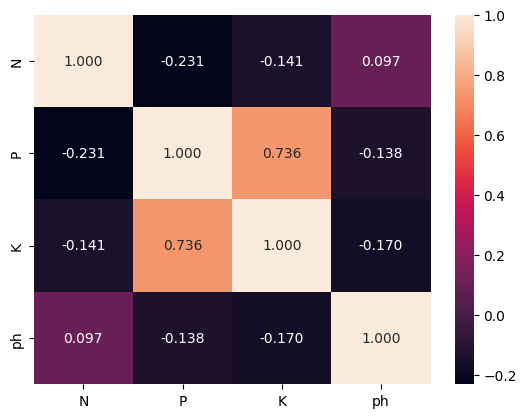

In [13]:
sns.heatmap(X.corr(), annot=True, fmt=".3f")

Most correlated features: 
- *K* and *P*
- *N* and *P*

Less correlated features:
- *N* and *ph*
- *P* and *ph*

In [14]:
final_features = ['N', 'K','ph']

## Setting final model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X[final_features], y, test_size=0.2, random_state=seed)

In [16]:
log_reg = LogisticRegression(max_iter=2000, multi_class='multinomial')
log_reg.fit(X_train, y_train)

/Users/gabriel/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000, multi_class='multinomial')

In [17]:
y_pred = log_reg.predict(X_test)

## Evaluate performance

In [18]:
model_performance = f1_score(y_test, y_pred, average='weighted')

In [19]:
model_performance

0.5504508201443855